# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import plotly.express as px

# Import Data

In [2]:
df = pd.read_csv('/kaggle/input/chemicals-in-cosmetics/Planilha sem ttulo - cscpopendata.csv')

# Data exploration

In [3]:
df.shape

(114635, 22)

In [4]:
df.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount'],
      dtype='object')

In [5]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


In [8]:
df.describe(include='O').transpose()

,count,unique,top,freq
ProductName,114635,33716,Eyecolor,766
CSF,80237,34243,Black,247
CompanyName,114635,606,L'Oreal USA,5747
BrandName,114408,2713,SEPHORA,3394
PrimaryCategory,114635,13,Makeup Products (non-permanent),75827
SubCategory,114635,89,"Lip Color - Lipsticks, Liners, and Pencils",16555
CasNumber,108159,125,13463-67-7,93049
ChemicalName,114635,123,Titanium dioxide,93480
InitialDateReported,114635,2274,10/13/2009,2557
MostRecentDateReported,114635,2178,12/30/2010,18127


In [9]:
# Checking if there null values
df.isnull().sum().sort_values(ascending=False)

ChemicalDateRemoved       111650
DiscontinuedDate          101715
CSF                        34398
CSFId                      33973
CasNumber                   6476
BrandName                    227
CDPHId                         0
ChemicalId                     0
ChemicalUpdatedAt              0
ChemicalCreatedAt              0
MostRecentDateReported         0
InitialDateReported            0
ChemicalName                   0
CasId                          0
ProductName                    0
SubCategory                    0
SubCategoryId                  0
PrimaryCategory                0
PrimaryCategoryId              0
CompanyName                    0
CompanyId                      0
ChemicalCount                  0
dtype: int64

In [10]:
# Percentage of null values
na_percentage = df.isnull().sum()/len(df)*100
na_percentage.sort_values(ascending=False)


ChemicalDateRemoved       97.396083
DiscontinuedDate          88.729446
CSF                       30.006543
CSFId                     29.635801
CasNumber                  5.649235
BrandName                  0.198020
CDPHId                     0.000000
ChemicalId                 0.000000
ChemicalUpdatedAt          0.000000
ChemicalCreatedAt          0.000000
MostRecentDateReported     0.000000
InitialDateReported        0.000000
ChemicalName               0.000000
CasId                      0.000000
ProductName                0.000000
SubCategory                0.000000
SubCategoryId              0.000000
PrimaryCategory            0.000000
PrimaryCategoryId          0.000000
CompanyName                0.000000
CompanyId                  0.000000
ChemicalCount              0.000000
dtype: float64

In [11]:
#Check for duplicate values
df.duplicated().sum()

215

In [12]:
#Drop duplicated data
df = df.drop_duplicates()
df.duplicated().sum()

0

# Data Cleaning

In [13]:
# Drop columns
df = df.drop(['ChemicalDateRemoved'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114420 entries, 0 to 114634
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114420 non-null  int64  
 1   ProductName             114420 non-null  object 
 2   CSFId                   80655 non-null   float64
 3   CSF                     80230 non-null   object 
 4   CompanyId               114420 non-null  int64  
 5   CompanyName             114420 non-null  object 
 6   BrandName               114193 non-null  object 
 7   PrimaryCategoryId       114420 non-null  int64  
 8   PrimaryCategory         114420 non-null  object 
 9   SubCategoryId           114420 non-null  int64  
 10  SubCategory             114420 non-null  object 
 11  CasId                   114420 non-null  int64  
 12  CasNumber               107945 non-null  object 
 13  ChemicalId              114420 non-null  int64  
 14  ChemicalName            1

In [14]:
# Drop rows with null values
df.dropna(subset=['BrandName'],inplace = True)

df.isnull().sum().sort_values(ascending=False)

DiscontinuedDate          101426
CSF                        34141
CSFId                      33716
CasNumber                   6460
CDPHId                         0
ChemicalUpdatedAt              0
ChemicalCreatedAt              0
MostRecentDateReported         0
InitialDateReported            0
ChemicalName                   0
ChemicalId                     0
SubCategory                    0
CasId                          0
ProductName                    0
SubCategoryId                  0
PrimaryCategory                0
PrimaryCategoryId              0
BrandName                      0
CompanyName                    0
CompanyId                      0
ChemicalCount                  0
dtype: int64

In [15]:
#Remove the columns which are the same, (cdphID & product name), (csfid &csf), 
#(company id and company name), (primary category id and primary category),
#(sub category id and sub category),(CasNumber, CasID and Chemical Name)
df = df.drop(['CDPHId','CSF' ,'CSFId','CompanyId','PrimaryCategoryId',
              'ChemicalId','SubCategoryId','CasNumber','CasId'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114193 entries, 0 to 114634
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductName             114193 non-null  object
 1   CompanyName             114193 non-null  object
 2   BrandName               114193 non-null  object
 3   PrimaryCategory         114193 non-null  object
 4   SubCategory             114193 non-null  object
 5   ChemicalName            114193 non-null  object
 6   InitialDateReported     114193 non-null  object
 7   MostRecentDateReported  114193 non-null  object
 8   DiscontinuedDate        12767 non-null   object
 9   ChemicalCreatedAt       114193 non-null  object
 10  ChemicalUpdatedAt       114193 non-null  object
 11  ChemicalCount           114193 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 11.3+ MB


In [16]:
df.dtypes

ProductName               object
CompanyName               object
BrandName                 object
PrimaryCategory           object
SubCategory               object
ChemicalName              object
InitialDateReported       object
MostRecentDateReported    object
DiscontinuedDate          object
ChemicalCreatedAt         object
ChemicalUpdatedAt         object
ChemicalCount              int64
dtype: object

In [17]:
# Convert date columns to datetime format
date_columns = ['InitialDateReported', 'MostRecentDateReported', 'ChemicalCreatedAt',
                'DiscontinuedDate' ,'ChemicalUpdatedAt']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce') 

In [18]:
df.dtypes

ProductName                       object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalCount                      int64
dtype: object

In [19]:
# Extract year from date columns
for column in date_columns:
    df[column + '_Year'] = df[column].dt.year


In [20]:
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount,InitialDateReported_Year,MostRecentDateReported_Year,ChemicalCreatedAt_Year,DiscontinuedDate_Year,ChemicalUpdatedAt_Year
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,1,2009,2013,2009,2011.0,2009
1,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,2,2009,2009,2009,NaN,2009
2,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,2,2009,2009,2009,NaN,2009
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,1,2009,2013,2009,NaN,2009
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,1,2009,2013,2009,2011.0,2009


In [21]:
# مقارنة عمودين ومعرفة إذا كانا يحتويان على نفس القيم في كل صف
same_values = df['ChemicalCreatedAt'] == df['ChemicalUpdatedAt']

# عرض النتيجة
print(same_values)

# لمعرفة إذا كانت جميع القيم متساوية بين العمودين
all_equal = same_values.all()
print(f"هل العمودان يحتويان على نفس القيم؟: {all_equal}")

0         True
1         True
2         True
3         True
4         True
          ... 
114630    True
114631    True
114632    True
114633    True
114634    True
Length: 114193, dtype: bool
هل العمودان يحتويان على نفس القيم؟: False


In [22]:
# حساب عدد القيم المتطابقة بين العمودين
matching_rows = (df['ChemicalCreatedAt'] == df['ChemicalUpdatedAt']).sum()

print(f"عدد الصفوف التي تحتوي على نفس القيم: {matching_rows}")

عدد الصفوف التي تحتوي على نفس القيم: 104638


In [23]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()    # إزالة المسافات الزائدة
    df[col] = df[col].str.capitalize()  # جعل أول حرف كبير


# Data Overview

### How Many Unique Products

In [24]:
df['ProductName'].nunique()

33380

### How Many Unique Chemicals 

In [25]:
df['ChemicalName'].nunique()

123

###  How many unique companies

In [26]:
df['CompanyName'].nunique()

600

### Unique PrimaryCategory

In [27]:
df['PrimaryCategory'].nunique()

13

### Unique SubCategory

In [28]:
df['SubCategory'].nunique()

89

### How Many Unique Brand

In [29]:
df['BrandName'].nunique()

2394

### What is the average count of chemicals

In [30]:
df['ChemicalCount'].mean()


1.289439808044276

### Which company has the most products in the dataset

In [31]:
df['CompanyName'].value_counts().idxmax()

"L'oreal usa"

### Which PrimaryCategory has the most records

In [32]:
df['PrimaryCategory'].value_counts().idxmax()


'Makeup products (non-permanent)'

### What is the number of products reported in each year

In [33]:
df['InitialDateReported_Year'].value_counts().sort_index()

InitialDateReported_Year
2009    30366
2010    14695
2011     4533
2012     3725
2013     6359
2014     8483
2015     7788
2016     4493
2017     7683
2018     9615
2019    13875
2020     2578
Name: count, dtype: int64

# Visualization

### Top 10 Products

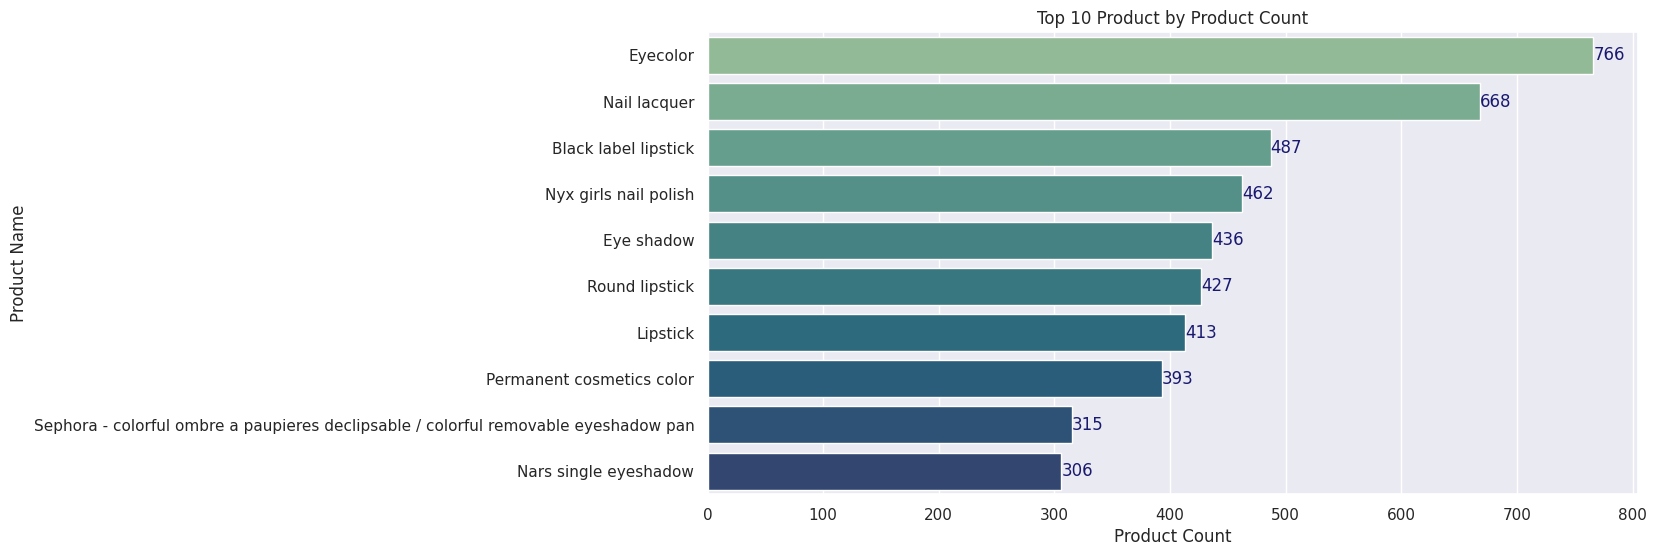

In [34]:
top_brands = df['ProductName'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_brands.values, y=top_brands.index, palette="crest")
plt.title("Top 10 Product by Product Count")
plt.xlabel("Product Count")
plt.ylabel("Product Name")
# Add data labels
for i in range(len(top_brands)):
    ax.text(top_brands.values[i] + 0.1, i, str(top_brands.values[i]), 
            color='MidnightBlue', va='center')
plt.show()


### Top 10 Products with the Most Chemicals

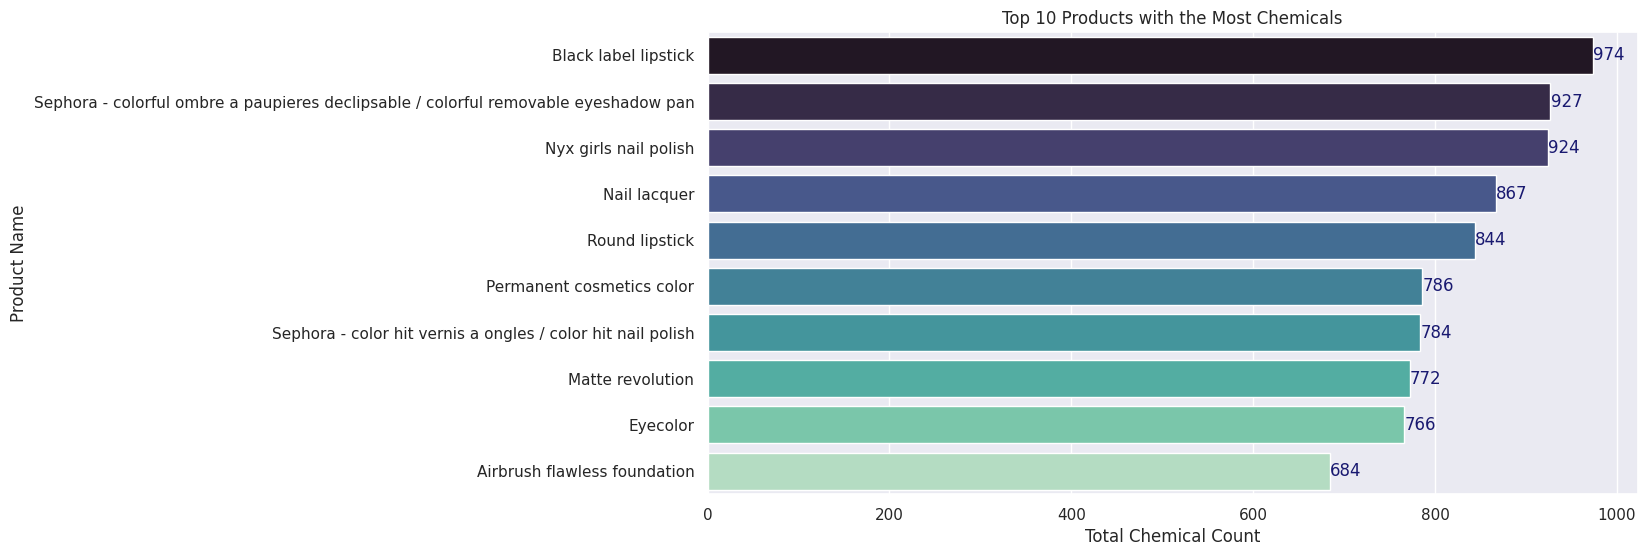

In [35]:
# Group by ProductName and sum the ChemicalCount for each product
product_chemical_counts = df.groupby("ProductName")['ChemicalCount'].sum().sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_chemical_counts.values, y=product_chemical_counts.index, palette="mako")
plt.title("Top 10 Products with the Most Chemicals")
plt.xlabel("Total Chemical Count")
plt.ylabel("Product Name")
# Add data labels
for i in range(len(product_chemical_counts)):
    ax.text(product_chemical_counts.values[i] + 0.1, i, str(product_chemical_counts.values[i]), 
            color='MidnightBlue', va='center')
plt.show()

###  Top 10 Brands

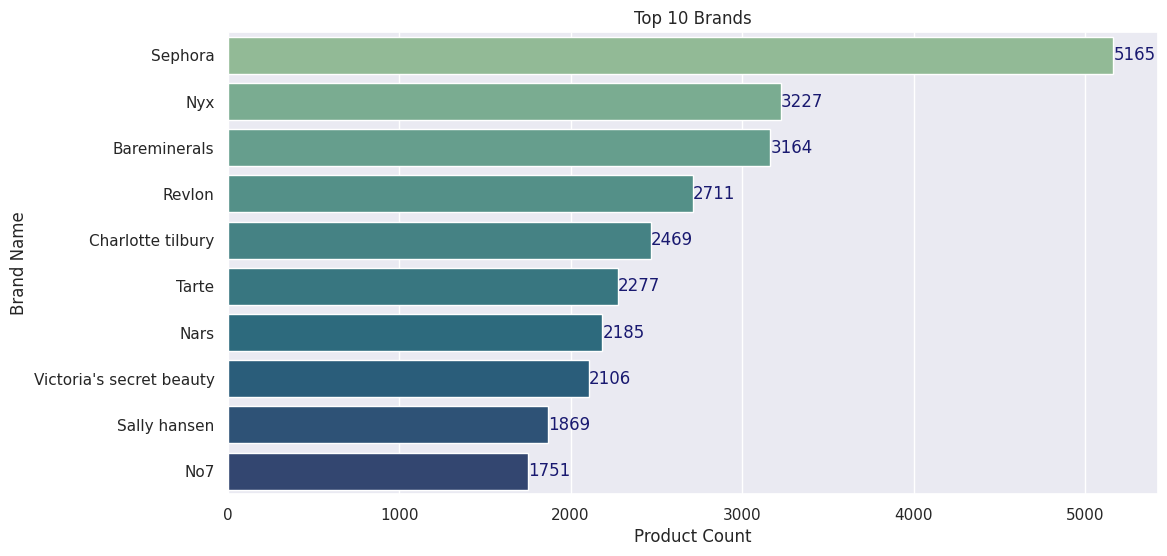

In [36]:
top_brands = df['BrandName'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_brands.values, y=top_brands.index, palette="crest")
plt.title("Top 10 Brands")
plt.xlabel("Product Count")
plt.ylabel("Brand Name")
# Add data labels
for i in range(len(top_brands)):
    ax.text(top_brands.values[i] + 0.1, i, str(top_brands.values[i]), 
            color='MidnightBlue', va='center')
plt.show()


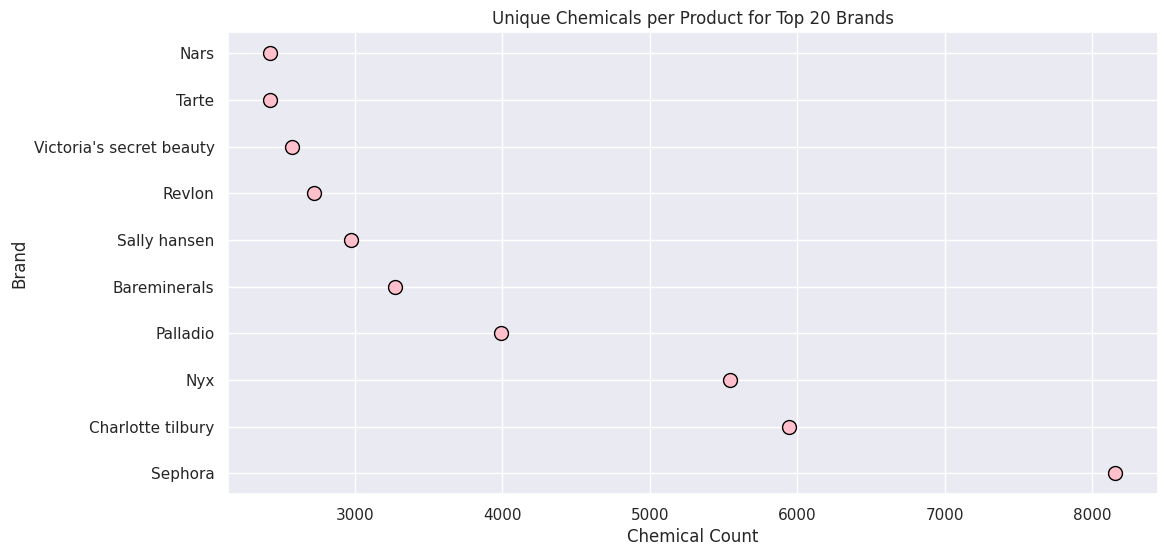

In [37]:
chemicals_per_brand = df.groupby('BrandName')['ChemicalCount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.scatter(
    chemicals_per_brand.values, 
    chemicals_per_brand.index, 
    color='pink', 
    edgecolor='black', 
    s=100
)
plt.title("Unique Chemicals per Product for Top 20 Brands")
plt.xlabel("Chemical Count")
plt.ylabel("Brand")
plt.grid(True)
plt.show()


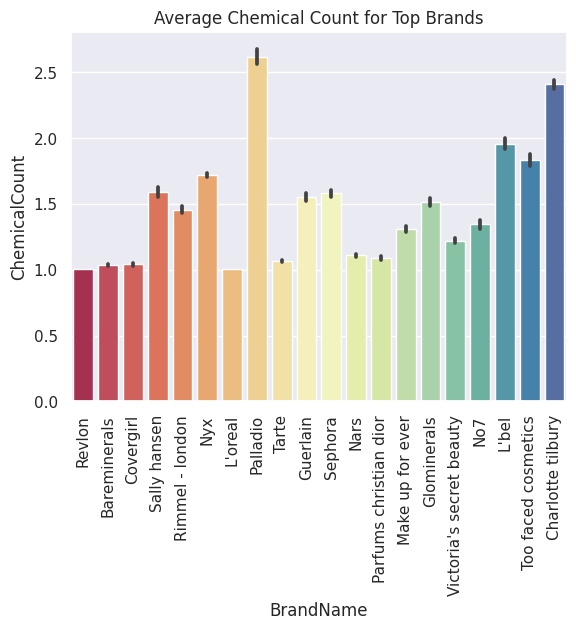

In [38]:
top_brands = df.groupby('BrandName')['ChemicalCount'].sum().sort_values(ascending=False).head(20).index
df_top_brands = df[df['BrandName'].isin(top_brands)]
sns.barplot(data=df_top_brands, x='BrandName', y='ChemicalCount', palette="Spectral", estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Average Chemical Count for Top Brands')
plt.show()


### Distribution of Primary Categories


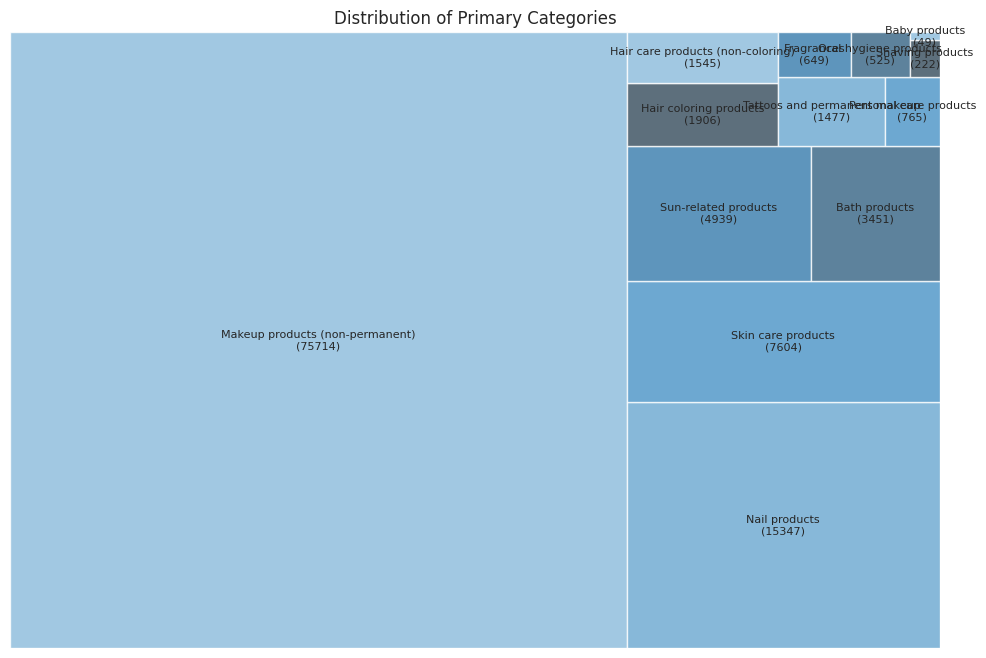

In [39]:
import squarify
# حساب توزيع الفئات الرئيسية
category_distribution = df['PrimaryCategory'].value_counts()
# رسم الخريطة الشجرية
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=category_distribution.values, 
    label=[f"{category}\n({count})" for category, count in zip(category_distribution.index, category_distribution.values)], 
    alpha=0.8, 
    color=sns.color_palette("Blues_d"),
    text_kwargs={'fontsize': 8}  # تصغير حجم النص
)
plt.title("Distribution of Primary Categories")
plt.axis('off')  # إزالة المحاور
plt.show()

### Chemicals per Primary Category

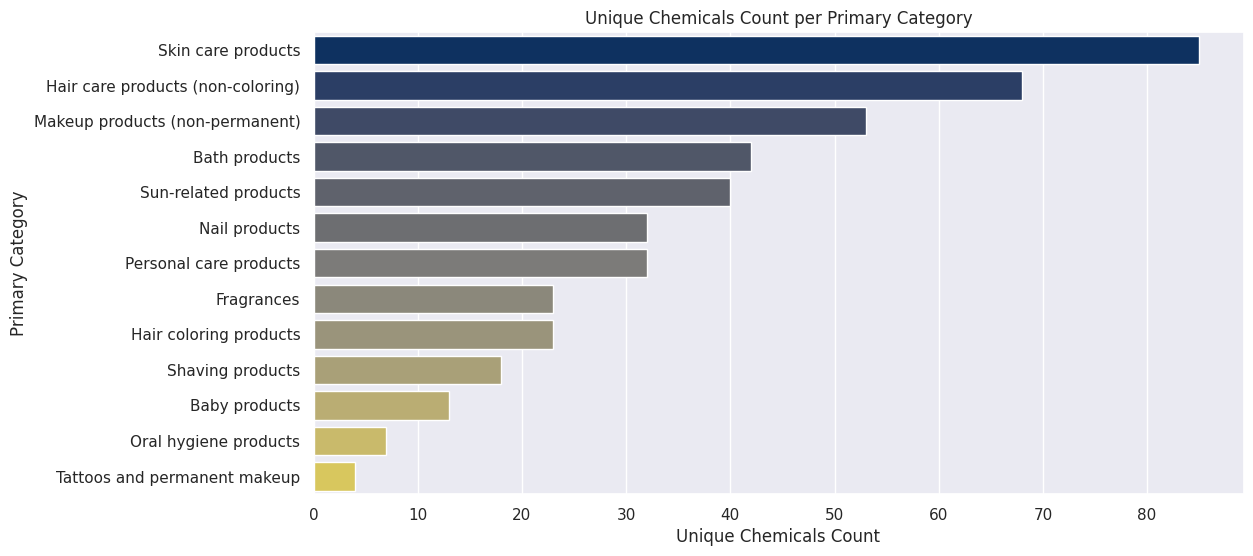

In [40]:
chemicals_per_category = df.groupby("PrimaryCategory")['ChemicalName'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=chemicals_per_category.values, y=chemicals_per_category.index, palette="cividis")
plt.title("Unique Chemicals Count per Primary Category")
plt.xlabel("Unique Chemicals Count")
plt.ylabel("Primary Category")
plt.show()

In [41]:
# حساب عدد المواد الكيميائية الفريدة لكل فئة رئيسية
#chemicals_per_category = df.groupby("PrimaryCategory")['ChemicalName'].nunique()

# رسم مخطط دائري
#plt.figure(figsize=(10, 8))
#chemicals_per_category.plot(kind='pie', autopct='%1.1f%%', colormap='cividis', legend=False,color='white')
#plt.title("Distribution of Unique Chemicals per Primary Category")
#plt.ylabel('')
#plt.show()


### Top 10 Subcategories

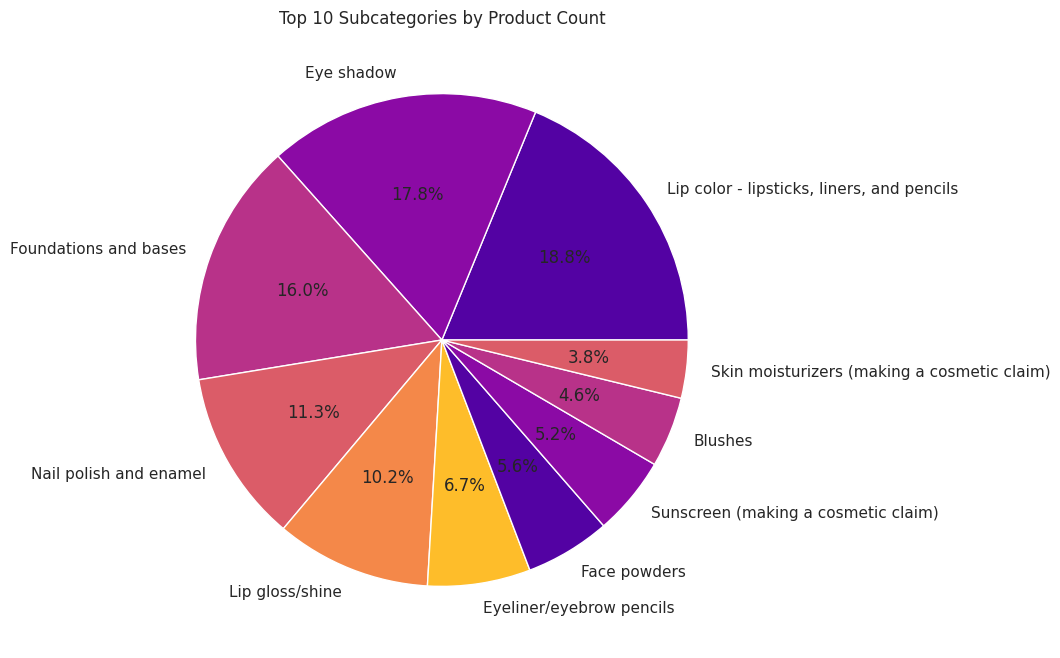

In [42]:
# حساب عدد المنتجات لكل فئة فرعية
subcategory_counts = df['SubCategory'].value_counts().head(10)

# رسم المخطط الدائري
plt.figure(figsize=(8, 8))
plt.pie(subcategory_counts.values, labels=subcategory_counts.index, autopct='%1.1f%%', colors=sns.color_palette("plasma"))
plt.title("Top 10 Subcategories by Product Count")
plt.show()


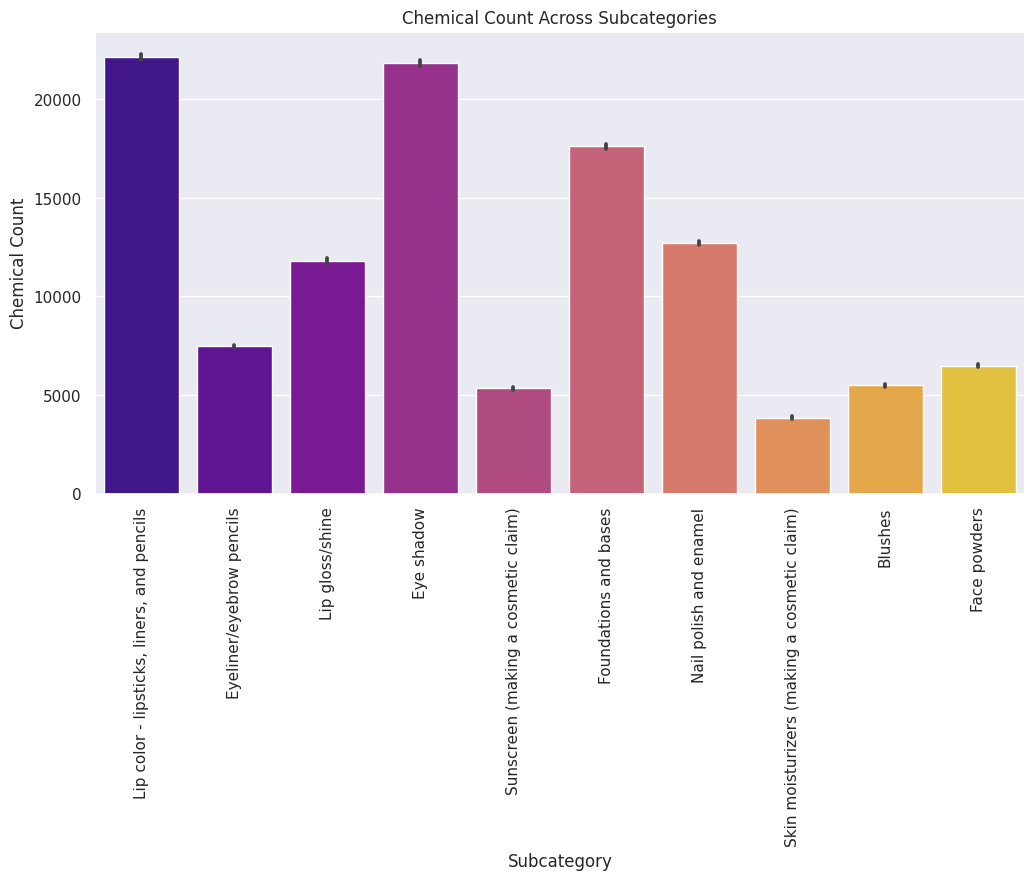

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='SubCategory', y='ChemicalCount', data=df[df['SubCategory'].isin(subcategory_counts.index)], palette="plasma", estimator=np.sum)
plt.title("Chemical Count Across Subcategories")
plt.xlabel("Subcategory")
plt.ylabel("Chemical Count")
plt.xticks(rotation=90)
plt.show()


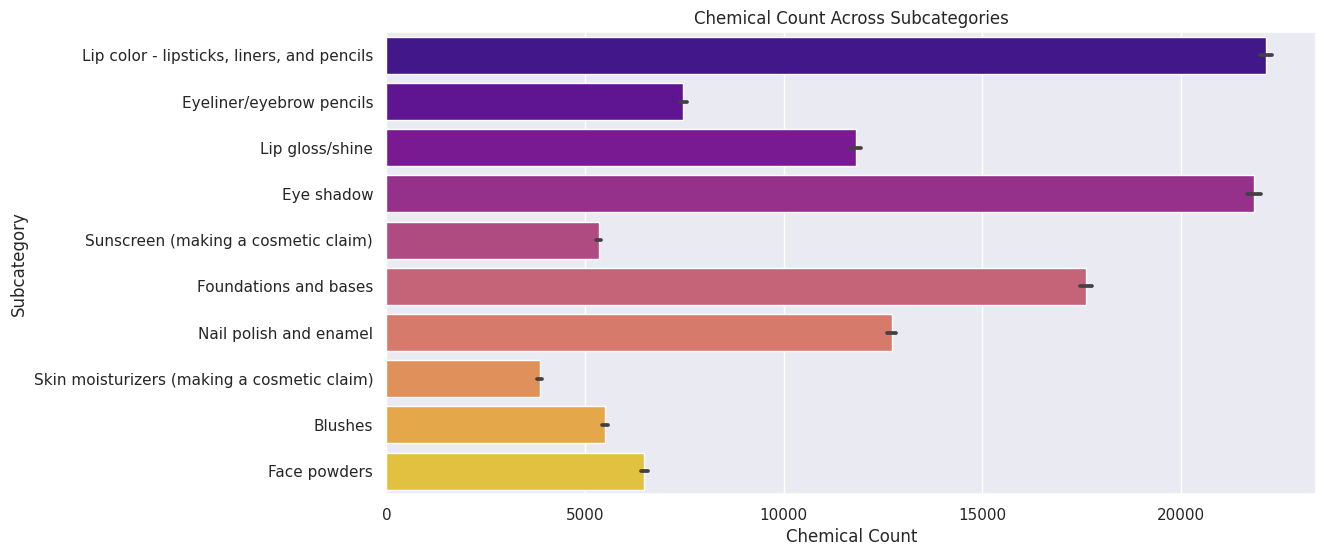

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(y='SubCategory', x='ChemicalCount', data=df[df['SubCategory'].isin(subcategory_counts.index)], palette="plasma", estimator=np.sum, orient='h')
plt.title("Chemical Count Across Subcategories")
plt.xlabel("Chemical Count")
plt.ylabel("Subcategory")
plt.show()


###  Top 10 Most Common Chemicals

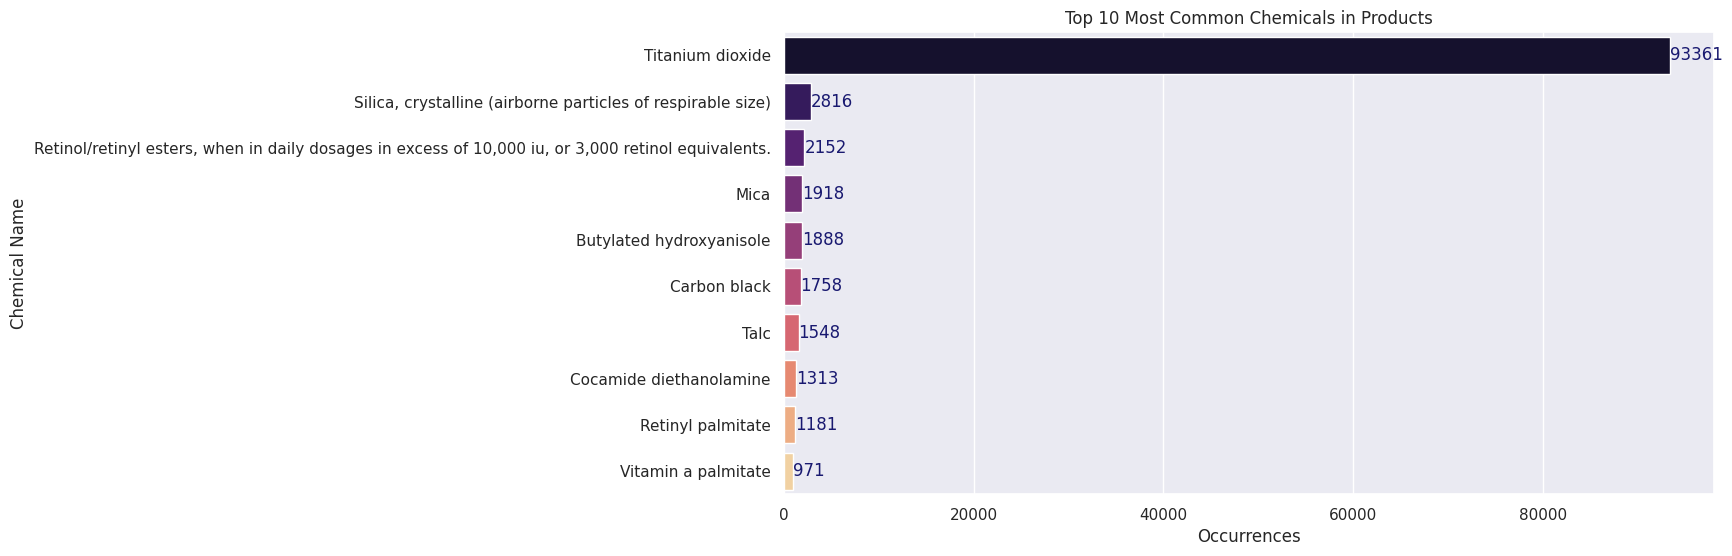

In [45]:
top_chemicals = df['ChemicalName'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=top_chemicals.values, y=top_chemicals.index, palette="magma")
plt.title("Top 10 Most Common Chemicals in Products")
plt.xlabel("Occurrences")
plt.ylabel("Chemical Name")
for i in range(len(top_chemicals)):
    ax.text(top_chemicals.values[i] + 0.1, i, str(top_chemicals.values[i]), 
            color='MidnightBlue', va='center')
plt.show()


### Top Companies

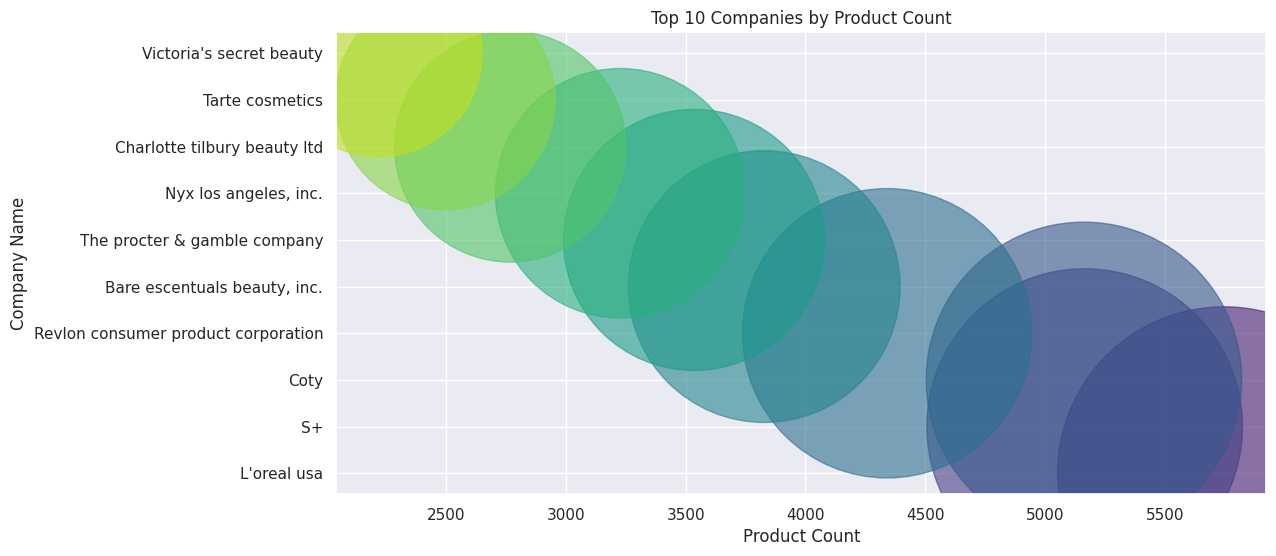

In [46]:
top_companies = df.groupby('CompanyName')['ProductName'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.scatter(
    x=top_companies.values, 
    y=top_companies.index, 
    s=top_companies.values * 10,  # حجم الفقاعات بناءً على عدد المنتجات
    alpha=0.6, 
    color=sns.color_palette("viridis", len(top_companies))
)
plt.title("Top 10 Companies by Product Count")
plt.xlabel("Product Count")
plt.ylabel("Company Name")
plt.show()


###  Top Companies by Unique Chemicals Used

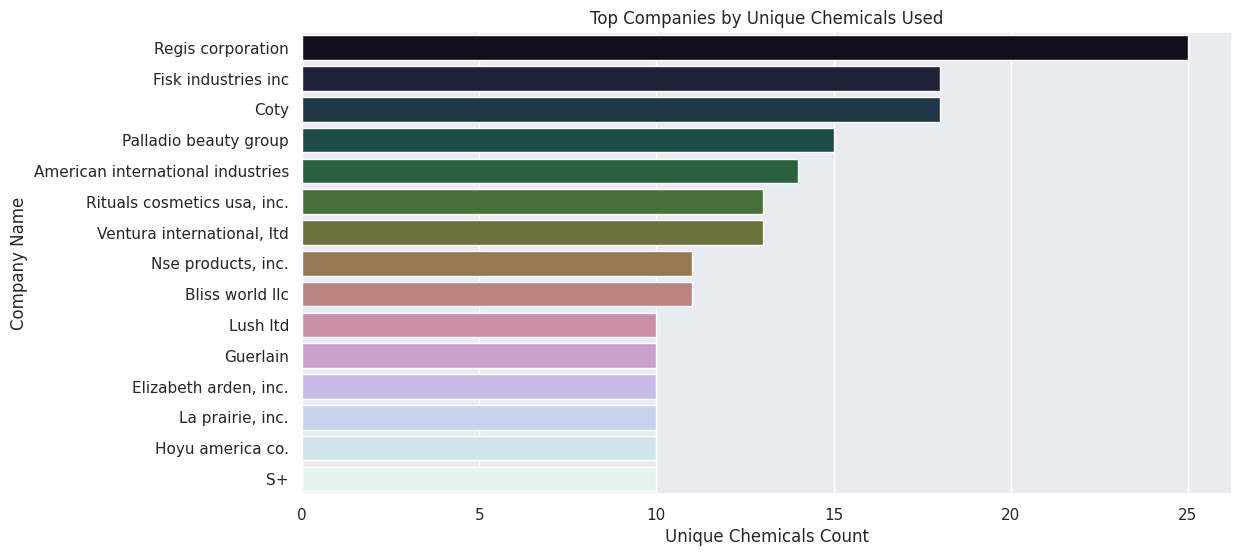

In [47]:
company_chemical_variety = df.groupby("CompanyName")['ChemicalName'].nunique().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=company_chemical_variety.values, y=company_chemical_variety.index, palette="cubehelix")
plt.title("Top Companies by Unique Chemicals Used")
plt.xlabel("Unique Chemicals Count")
plt.ylabel("Company Name")
plt.show()

###  New Chemicals Introduction Over Time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


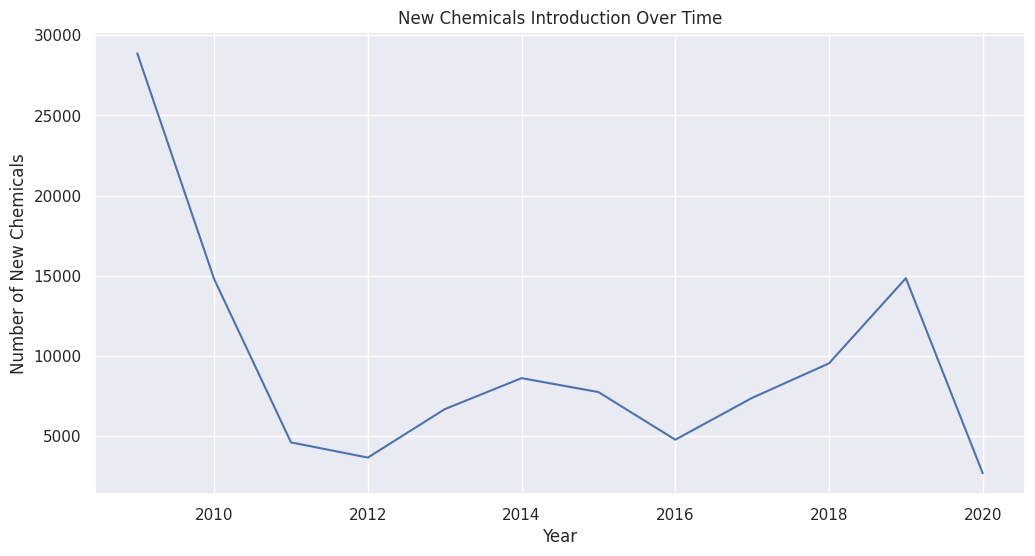

In [48]:
new_chemicals_over_time = df['ChemicalCreatedAt_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=new_chemicals_over_time.index, y=new_chemicals_over_time.values)
plt.title("New Chemicals Introduction Over Time")
plt.xlabel("Year")
plt.ylabel("Number of New Chemicals")
plt.show()

### Timeline of Chemical Updates

### Average Duration Between Initial and Most Recent Reported Dates

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


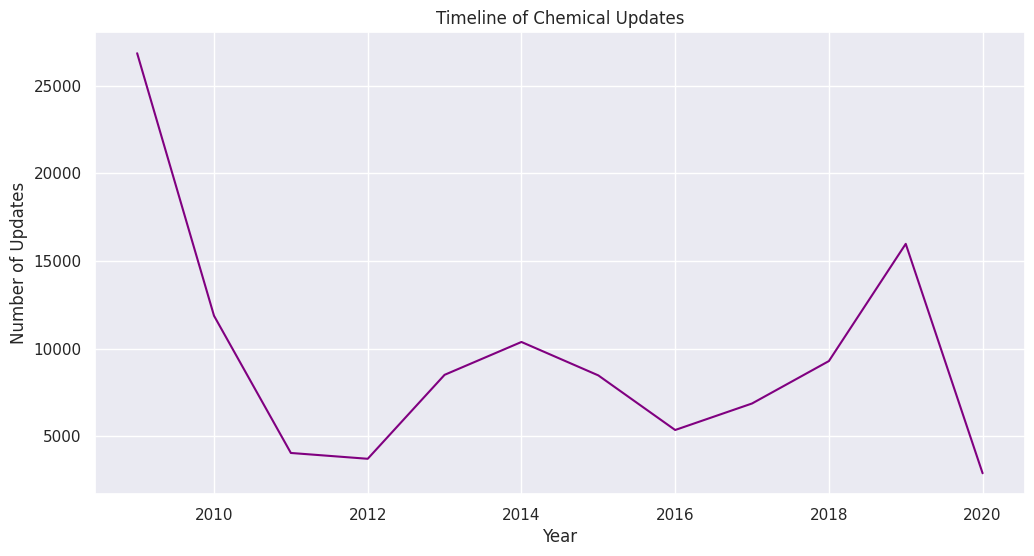

In [49]:
chemical_updates_trend = df['ChemicalUpdatedAt_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=chemical_updates_trend.index, y=chemical_updates_trend.values, color="purple")
plt.title("Timeline of Chemical Updates")
plt.xlabel("Year")
plt.ylabel("Number of Updates")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


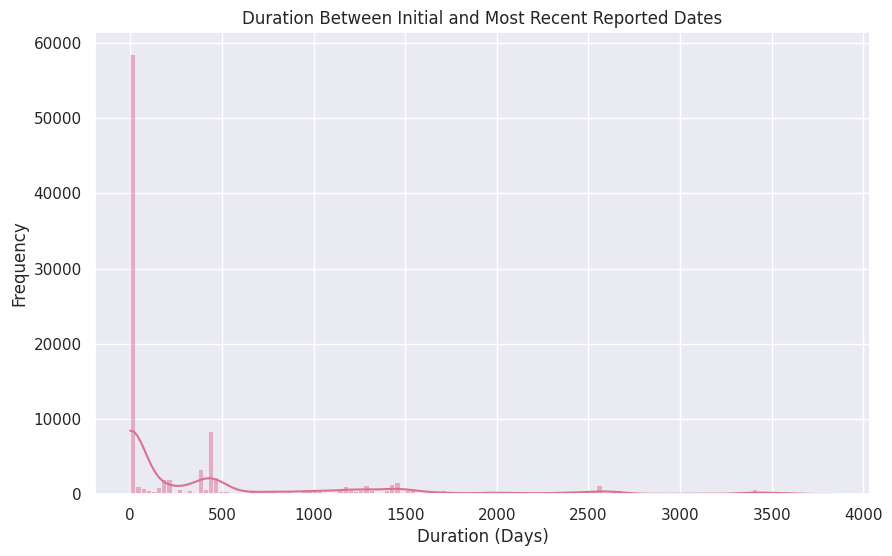

In [50]:
df['ReportingDuration'] = (df['MostRecentDateReported'] - df['InitialDateReported']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df['ReportingDuration'].dropna(), kde=True, color="#DB7093")
plt.title("Duration Between Initial and Most Recent Reported Dates")
plt.xlabel("Duration (Days)")
plt.ylabel("Frequency")
plt.show()

###  Reporting Frequency Over Time for Chemical Categories

<Figure size 1400x800 with 0 Axes>

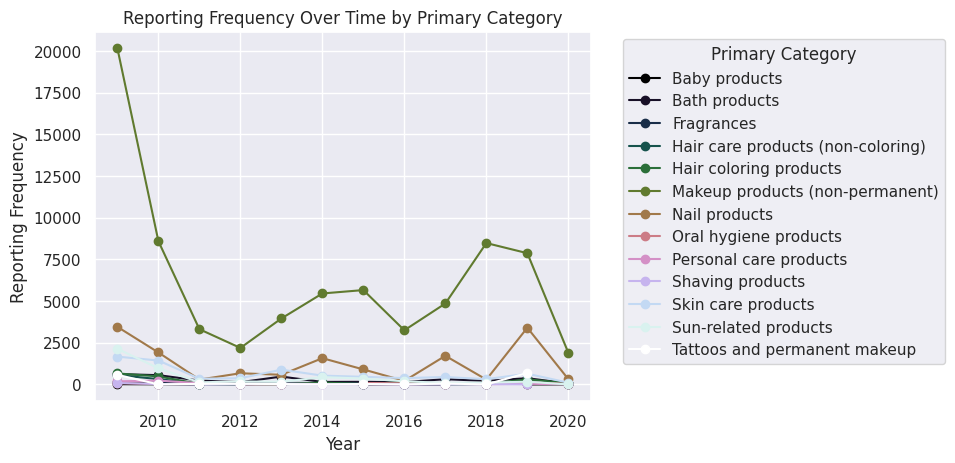

In [51]:
reporting_frequency = df.groupby([df['InitialDateReported_Year'], 'PrimaryCategory']).size().unstack()

plt.figure(figsize=(14, 8))
reporting_frequency.plot(kind="line", marker="o", cmap="cubehelix")
plt.title("Reporting Frequency Over Time by Primary Category")
plt.xlabel("Year")
plt.ylabel("Reporting Frequency")
plt.legend(title="Primary Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


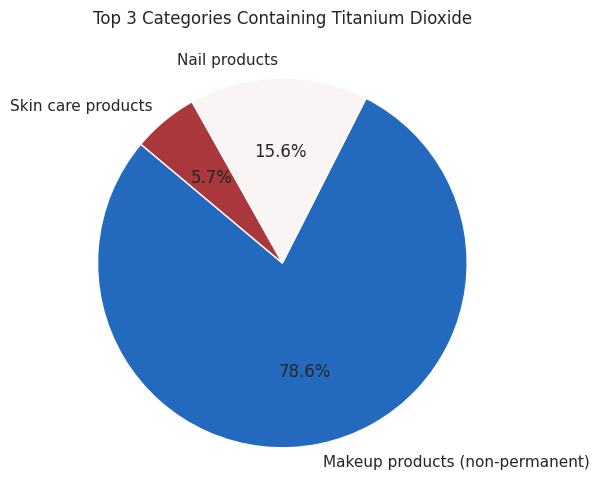

In [52]:
# Calculate the top categories of products that contain Titanium dioxide
titanium_dioxide_products = df[df['ChemicalName'] == 'Titanium dioxide']['PrimaryCategory'].value_counts().head(3)

# رسم Pie Chart
plt.figure(figsize=(10, 6))
titanium_dioxide_products.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="vlag")
plt.title("Top 3 Categories Containing Titanium Dioxide")
plt.ylabel("")  
plt.show()


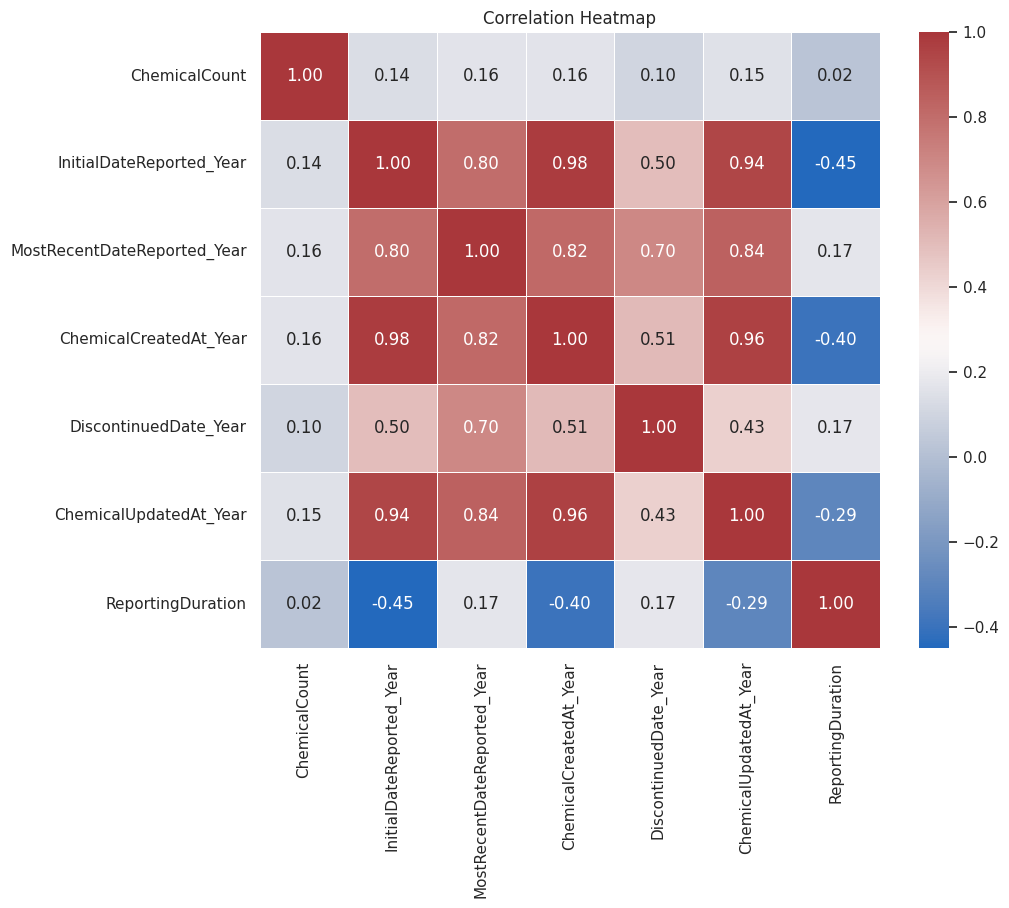

In [53]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


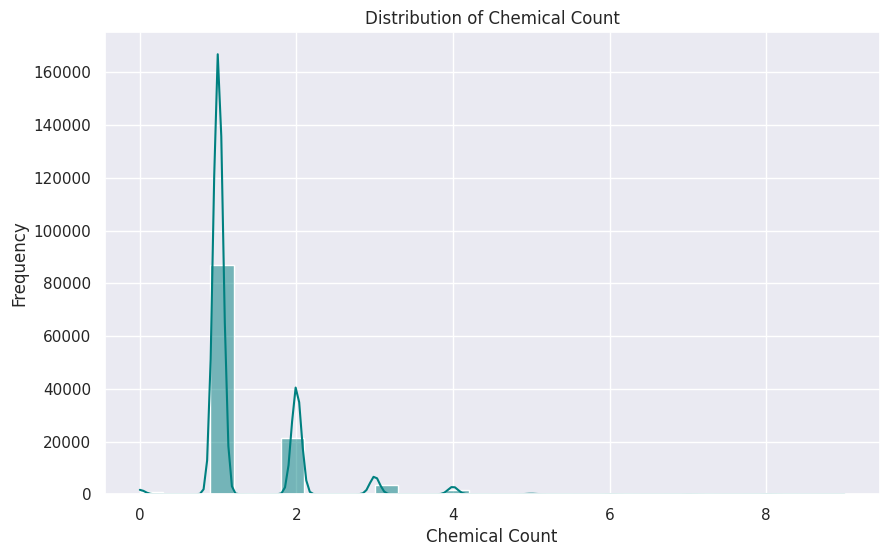

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ChemicalCount'].dropna(), bins=30, kde=True, color='teal')
plt.title("Distribution of Chemical Count")
plt.xlabel("Chemical Count")
plt.ylabel("Frequency")
plt.show()


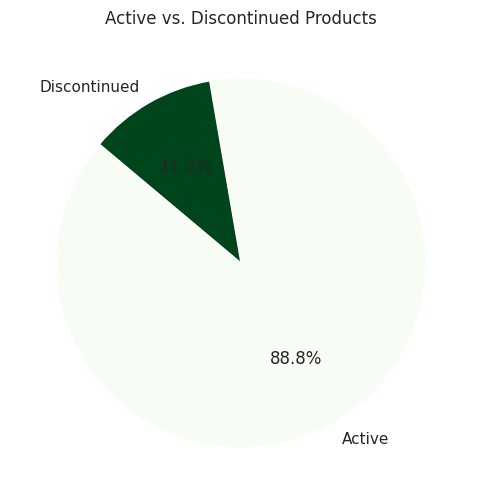

In [55]:
# Create a new column to classify products as Active or Discontinued based on DiscontinuedDate
df['ProductStatus'] = df['DiscontinuedDate'].apply(lambda x: 'Discontinued' if pd.notnull(x) else 'Active')

# Calculate the counts for Active vs. Discontinued Products
status_counts = df['ProductStatus'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="Greens")
plt.title("Active vs. Discontinued Products")
plt.ylabel("")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


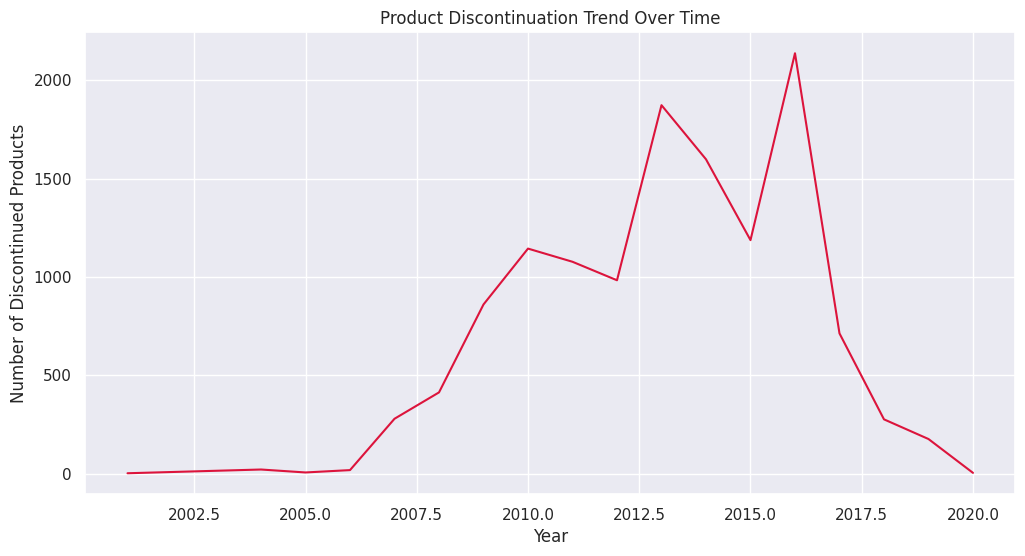

In [56]:
discontinuation_trend = df['DiscontinuedDate_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=discontinuation_trend.index, y=discontinuation_trend.values, color="crimson")
plt.title("Product Discontinuation Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Discontinued Products")
plt.show()

In [57]:
df.columns

Index(['ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory',
       'SubCategory', 'ChemicalName', 'InitialDateReported',
       'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt',
       'ChemicalUpdatedAt', 'ChemicalCount', 'InitialDateReported_Year',
       'MostRecentDateReported_Year', 'ChemicalCreatedAt_Year',
       'DiscontinuedDate_Year', 'ChemicalUpdatedAt_Year', 'ReportingDuration',
       'ProductStatus'],
      dtype='object')

In [58]:
df.shape

(114193, 19)